In [1]:
#Leveraged code from class.  Download the California data (not to your repo!) and load it into a dataframe
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# Create date parser to pass to read_csv
import datetime
d = lambda x: pd.datetime.strptime(x, '%d-%b-%y')

!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
#This is the file of just the 20 countries 
PISA = pd.read_csv('qqq20.csv', index_col=False)

C:\Users\Siobhan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (21,23,24,32,37,40,41,42,43,44,45,51,56,63,64,65,66,67,68,69,70,71,73,75,76,80,81,82,83,85,86,87,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,112,113,114,115,117,118,119,120,121,128,129,130,131,132,133,134,135,136,137,138,139,140,141,176,178,180,181,182,183,184,185,186,188,190,192,193,194,195,199,200,202,204,206,210,213,218,220,221,222,223,226,227,229,230,231,233,234,235,236,237,250,260,267,271,650,651,652,653,654,655,656,657,669,672,673,676,677,678,679,680,681,712,717,721,722,723,724,725,726,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919) have mixed types. Specify dtype option on impo

--------------------------------------------Mean Scores by Birt Month/Year --------------------------------------

In [6]:
PISA_SUB = PISA[['ST003D03T', 'ST003D02T', 'ReadScore', 'MathScore', 'ScieScore', 'Country']]


In [19]:
#Group by birth year and month
PISA2 = PISA_SUB.groupby(['ST003D03T', 'ST003D02T'])

In [23]:
#Grab the means for that grouping
PISA3 = PISA2['Read'] 
PISA_4_Scie = PISA3.agg('mean')
PISA_4_Scie = PISA_4_Scie.reset_index()


In [29]:
#Reformat the Moth Year so we can join to something more descriptive
PISA_4_Scie = PISA_4_Scie.assign(Month =PISA_4_Scie.ST003D02T.astype('str'))

In [30]:
PISA_4_Scie = PISA_4_Scie.assign(Year =PISA_4_Scie.ST003D03T.astype('str'))

In [38]:
PISA_4_Scie = PISA_4_Scie.assign(YearMonth = PISA_4_Scie.Year +'/'+ PISA_4_Scie.Month)

In [50]:
x=pd.Series(
['Feb-99','Mar-99','Apr-99','May-99','Jun-99','Jul-99','Aug-99','Sep-99','Oct-99','Nov-99','Dec-99','Jan-00','Feb-00','Mar-00','Apr-00','May-00','Jun-00','Jul-00','Aug-00'], index = ['1999.0/2.0','1999.0/3.0','1999.0/4.0','1999.0/5.0','1999.0/6.0','1999.0/7.0','1999.0/8.0','1999.0/9.0','1999.0/10.0','1999.0/11.0','1999.0/12.0','2000.0/1.0','2000.0/2.0','2000.0/3.0','2000.0/4.0','2000.0/5.0','2000.0/6.0','2000.0/7.0','2000.0/8.0']
)


In [51]:
y = pd.DataFrame(x)

In [58]:
y.columns=[ 'Month-Year']

In [ ]:
PISA_5_Scie = pd.merge(PISA_4_Scie, y, left_on='YearMonth', right_index=True)

In [68]:
PISA_5_Scie

,ST003D03T,ST003D02T,ScieScore,Month,Year,YearMonth,Month-Year
1,"1,999.00",2.00,481.67,2.0,1999.0,1999.0/2.0,Feb-99
2,"1,999.00",3.00,481.99,3.0,1999.0,1999.0/3.0,Mar-99
3,"1,999.00",4.00,485.08,4.0,1999.0,1999.0/4.0,Apr-99
4,"1,999.00",5.00,478.89,5.0,1999.0,1999.0/5.0,May-99
5,"1,999.00",6.00,475.49,6.0,1999.0,1999.0/6.0,Jun-99
6,"1,999.00",7.00,475.76,7.0,1999.0,1999.0/7.0,Jul-99
7,"1,999.00",8.00,474.29,8.0,1999.0,1999.0/8.0,Aug-99
8,"1,999.00",9.00,479.34,9.0,1999.0,1999.0/9.0,Sep-99
9,"1,999.00",10.00,474.49,10.0,1999.0,1999.0/10.0,Oct-99
10,"1,999.00",11.00,473.05,11.0,1999.0,1999.0/11.0,Nov-99


In [72]:
abc.set_xlim(400, 550)

(400, 550)

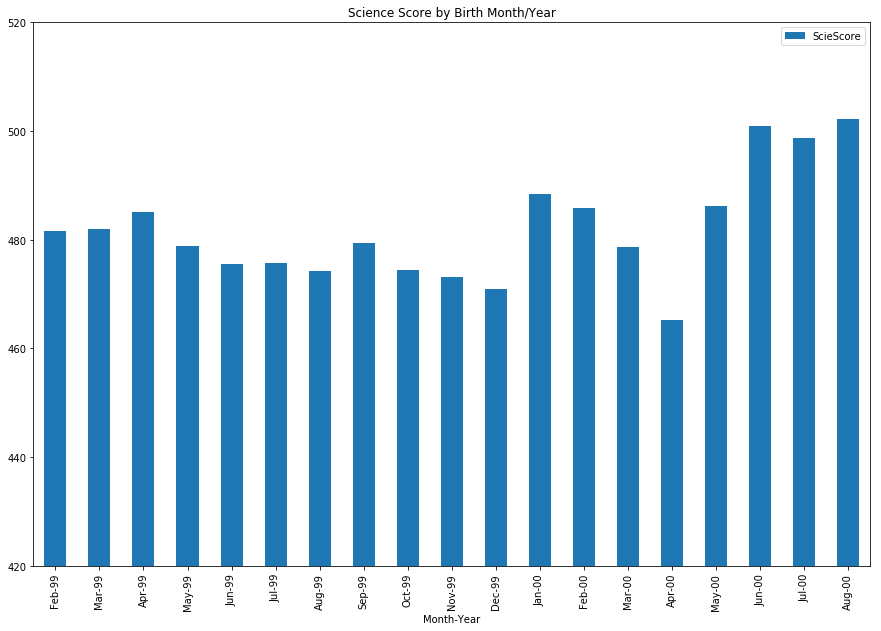

In [79]:
abc= PISA_5_Scie.plot.bar(x='Month-Year', y = "ScieScore", title = "Science Score by Birth Month/Year", figsize = (15,10), ylim=(420,520))

----------------------------Motivation - I want top grades ----------------------------

In [145]:
#I want top grades. 1= strongly disagree, 2 = disagree , 3= agree, 4= Strongly Agree
PISA.ReadScore.value_counts()

532.72    4
490.37    4
524.29    4
391.78    3
468.75    3
485.35    3
375.83    3
522.80    3
540.52    3
422.74    3
372.26    3
470.42    3
535.31    3
555.23    3
532.03    3
547.49    3
482.96    3
586.86    3
466.26    3
472.41    3
547.69    3
558.46    3
572.37    3
502.59    3
578.02    3
539.38    3
473.63    3
569.28    3
601.81    3
588.25    3
         ..
365.17    1
518.66    1
543.28    1
515.25    1
459.62    1
492.25    1
482.49    1
416.81    1
587.67    1
506.83    1
473.79    1
488.52    1
491.52    1
279.65    1
563.04    1
495.85    1
605.88    1
413.29    1
561.10    1
467.14    1
539.59    1
460.62    1
620.53    1
391.88    1
442.03    1
591.35    1
485.29    1
496.46    1
622.59    1
491.74    1
Name: ReadScore, Length: 124759, dtype: int64

In [ ]:
PISA_TEST = PISA([ST119Q01NA, ReadScore''])

In [10]:
PISA_COR = PISA[['ST119Q01NA', 'ReadScore', 'MathScore', 'ScieScore', 'Country']]

In [11]:
PISA_COR.head(10)

,ST119Q01NA,ReadScore,MathScore,ScieScore,Country
0,3.0,408.69,416.33,397.33,Chile
1,4.0,342.67,385.25,355.43,Chile
2,4.0,435.73,364.55,381.38,Chile
3,3.0,389.99,364.69,379.00,Chile
4,4.0,441.18,407.88,405.56,Chile
5,4.0,337.89,349.22,365.87,Chile
6,3.0,440.29,453.77,409.50,Chile
7,3.0,505.78,497.80,533.02,Chile
8,3.0,413.34,359.35,407.74,Chile
9,3.0,449.84,450.23,445.53,Chile


In [61]:
#This field is not entirely populated. In fact, Argentina was not included.
PISA[(PISA['ST119Q01NA'] == 'None')]

,Unnamed: 0,CNTRYID,CNT,CNTSCHID,CNTSTUID,CYC,NatCen,Region,STRATUM,SUBNATIO,...,SENWT,VER_DAT,ReadScore,MathScore,ScieScore,MathRank,ReadRank,ScieRank,Country,Month
51,51,[152.0,'CHL',"15,200,002.00","15,203,060.00",'06MS','015200',"15,200.00",'CHL0210','1520000',...,1.52,'14NOV16:22:06:00'],365.18,350.80,397.79,1,1,2,Chile,None
61,61,[152.0,'CHL',"15,200,002.00","15,206,133.00",'06MS','015200',"15,200.00",'CHL0210','1520000',...,1.37,'14NOV16:22:06:00'],271.90,349.89,376.32,1,1,1,Chile,None
72,72,[152.0,'CHL',"15,200,003.00","15,207,482.00",'06MS','015200',"15,200.00",'CHL0212','1520000',...,1.00,'14NOV16:22:06:00'],380.26,307.25,356.80,1,2,1,Chile,None
113,113,[152.0,'CHL',"15,200,004.00","15,203,631.00",'06MS','015200',"15,200.00",'CHL0216','1520000',...,0.96,'14NOV16:22:06:00'],382.57,329.32,362.98,1,2,1,Chile,None
117,117,[152.0,'CHL',"15,200,004.00","15,205,813.00",'06MS','015200',"15,200.00",'CHL0216','1520000',...,1.07,'14NOV16:22:06:00'],342.68,284.60,353.53,1,1,1,Chile,None
349,349,[152.0,'CHL',"15,200,011.00","15,205,286.00",'06MS','015200',"15,200.00",'CHL0210','1520000',...,1.01,'14NOV16:22:06:00'],380.63,318.21,357.06,1,2,1,Chile,None
453,453,[152.0,'CHL',"15,200,014.00","15,201,411.00",'06MS','015200',"15,200.00",'CHL0210','1520000',...,1.46,'14NOV16:22:06:00'],473.89,391.61,458.35,2,3,3,Chile,None
522,522,[152.0,'CHL',"15,200,015.00","15,204,401.00",'06MS','015200',"15,200.00",'CHL0212','1520000',...,1.04,'14NOV16:22:06:00'],525.28,454.73,504.46,3,4,4,Chile,None
766,766,[152.0,'CHL',"15,200,023.00","15,206,959.00",'06MS','015200',"15,200.00",'CHL0106','1520000',...,0.80,'14NOV16:22:06:00'],443.36,402.84,446.96,2,3,3,Chile,None
965,965,[152.0,'CHL',"15,200,029.00","15,202,332.00",'06MS','015200',"15,200.00",'CHL0216','1520000',...,0.56,'14NOV16:22:06:00'],419.63,348.18,393.31,1,2,2,Chile,None


In [88]:
#Interested in understand if there's a correlation between motivation and math results
PISA_COR = PISA_COR.assign(MathRank =pd.qcut(PISA_COR.MathScore, 4,  labels=["1","2","3","4"]))

In [206]:
PISA_COR_MATH = PISA_COR[['ST119Q01NA', 'MathRank', 'Country']]

In [213]:
PISA_COR_MATH = PISA_COR_MATH[(PISA_COR_MATH['ST119Q01NA'] != 'None')]


In [214]:
PISA_COR_MATH = PISA_COR_MATH.assign(MathRank =PISA_COR_MATH.MathRank.astype('float'))

In [ ]:
#Correlate quartile with motivtation 1,2,3,4. It was .03!!
PISA_COR_MATH.corr()

In [154]:
#PISA_COR2 = PISA_COR[(PISA['ST119Q01NA'] != 'None')]

PISA_COR2 = PISA_COR2.assign(ST119Q01NA =PISA_COR2.ST119Q01NA.astype('float'))

In [157]:
#Overall, scores are correlated to each other. This python functionality is cool.
PISA_COR.corr()

,ReadScore,MathScore,ScieScore
ReadScore,1.00,0.89,0.93
MathScore,0.89,1.00,0.94
ScieScore,0.93,0.94,1.00


In [ ]:
#Reformat data for ease in plotting.  

In [240]:
#Counts by motivation factor
PISA.ST119Q01NA.value_counts()

4.0     54762
3.0     49916
2.0     16652
None     5265
1.0      3923
Name: ST119Q01NA, dtype: int64

In [260]:
#Just populated manually since only 4 values
allwant = pd.DataFrame({'Response':['Strongly Disagree','Disagree', 'Agree', 'Strongly Agree'],'CNT':[3923,16652, 49916, 54762]})
# pd.DataFrame({'CNT': ["'LTU'","'KOR'","'EST'","'CHL'","'QAT'","'GBR'","'PER'","'FIN'","'JPN'","'LUX'","'DOM'","'NLD'","'DNK'","'IRL'","'TUN'","'MAC'","'POL'","'GRC'","'QAR'","'MAC'","'USA'"], 'Country':['Lithuania','Korea','Estonia','Chile','Qatar','United Kingdom','Peru','Finland','Japan','Luxembourg','Dominican Republic','Netherlands','Denmark','Ireland','Tunisia','Macao','Poland','Greece','Argentina','Macao','USA']})

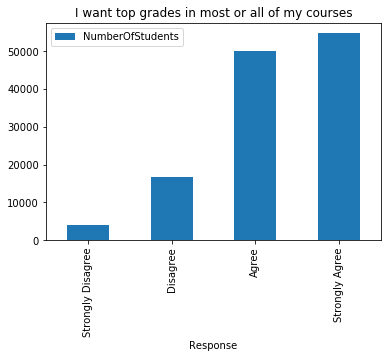

In [262]:
#This is why the correlation wasnt strong. It's not evenly distributed.
allwant.plot.bar(x='Response', title = "I want top grades in most or all of my courses")

#Swich directions.  Correlation is not incredibly strong, so we'll plot it by average to show slight relationship

In [41]:
PISA = PISA.assign(ST119Q01NA =PISA.ST119Q01NA.astype('str'))
PISA['ST119Q01NA'] = PISA['ST119Q01NA'].map(lambda x: x.strip())
PISA_COR = PISA[['ST119Q01NA', 'ReadScore', 'MathScore', 'ScieScore', 'Country']]

In [42]:
#Average Score By Motivation
PISA_Want_2 = PISA_COR.groupby(['ST119Q01NA', 'Country'])
PISA_Want_3 = PISA_Want_2['MathScore'] 
PISA_4_Want = PISA_Want_3.agg('mean')
PISA_4_Want = PISA_4_Want.reset_index()

#PISA_COR_3M = PISA_COR['MathScore'] 
#PISA_4M_COR = PISA_COR_3M.agg('mean')
#PISA_4M_COR= PISA_4M_COR.reset_index()
#PISA_5M_COR =pd.merge(PISA_4_GenderM[(PISA_4_GenderM['ST004D01T']==1.00)] , PISA_4_GenderM[(PISA_4_GenderM['ST004D01T']==2.00)], on='Country')

In [63]:
#Average Score By Motivation
PISA_Want_2 = PISA_COR.groupby(['ST119Q01NA', 'Country'])
PISA_Want_3 = PISA_Want_2['ReadScore'] 
PISA_4_Want = PISA_Want_3.agg('mean')
PISA_4_Want = PISA_4_Want.reset_index()
PISA_4_Want = PISA_4_Want.sort_values(['Country','ST119Q01NA' ], ascending=True)

In [64]:
p1 =pd.merge(PISA_4_Want[(PISA_4_Want['ST119Q01NA']=="4.0")] ,PISA_4_Want[(PISA_4_Want['ST119Q01NA']=="3.0")], on='Country', how='left')
p2 = pd.merge(p1, PISA_4_Want[(PISA_4_Want['ST119Q01NA']=="2.0")], on='Country', how='left')
p3 = pd.merge(p2, PISA_4_Want[(PISA_4_Want['ST119Q01NA']=="1.0")], on='Country', how ='left')
p3.columns =['Want', 'Country', 'Score-1', 'Want2',  'Score-2', 'Want-3', 'Score-3', 'Want-4', 'Score-4']
p4 = p3[['Country','Score-4', 'Score-3','Score-2','Score-1' ]]
p4.columns = ['Country','Strongly Dont Want', 'Dont Want', 'Want', 'Strongly Want']


In [65]:
p4

,Country,Strongly Dont Want,Dont Want,Want,Strongly Want
0,Chile,451.18,465.18,467.82,485.68
1,Denmark,449.55,475.17,491.98,510.49
2,Dominican Republic,324.61,363.79,365.33,370.50
3,Estonia,457.22,506.28,507.47,540.60
4,Finland,485.85,519.45,533.51,551.71
5,Greece,435.77,459.40,478.88,500.78
6,Ireland,472.28,501.47,509.66,535.20
7,Japan,480.22,501.46,520.15,536.62
8,Korea,437.87,477.18,504.31,539.94
9,Lithuania,421.68,435.40,461.45,490.12


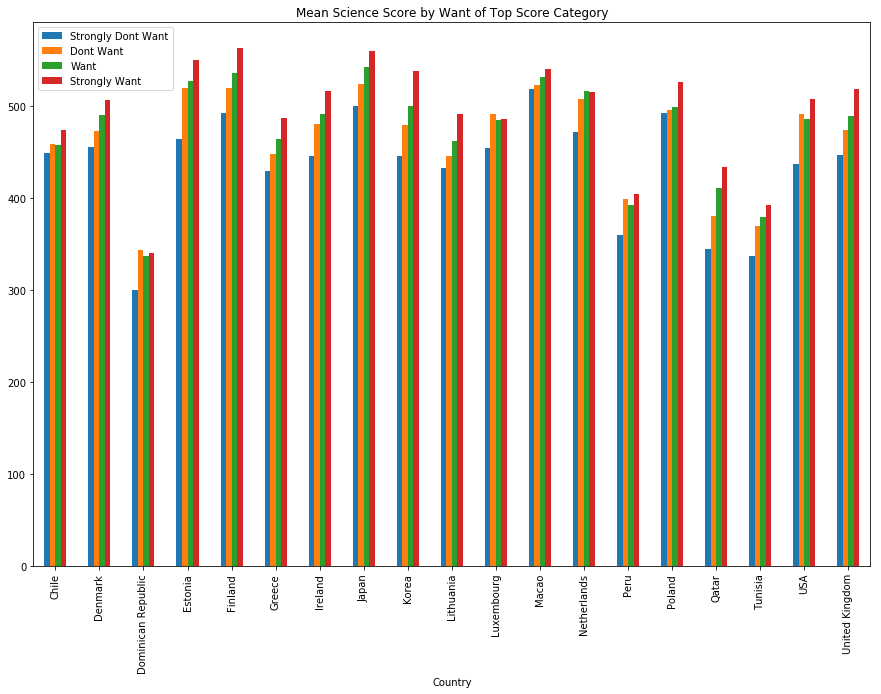

In [58]:
p4.plot.bar(x='Country', title = "Mean Science Score by Want of Top Score Category", figsize = (15,10))

In [51]:
#where's argentina?
PISA[(PISA['Country'] =='Argentina')].ST119Q01NA.value_counts()

None    1657
Name: ST119Q01NA, dtype: int64

In [50]:
#Double check this was correct.
PISA_COR[(PISA_COR['Country'] =='Argentina')]

,ST119Q01NA,ReadScore,MathScore,ScieScore,Country
123149,None,440.82,425.65,424.81,Argentina
123150,None,405.05,369.61,386.26,Argentina
123151,None,420.01,411.30,417.30,Argentina
123152,None,430.87,369.54,456.83,Argentina
123153,None,432.87,378.66,394.60,Argentina
123154,None,451.29,424.14,449.79,Argentina
123155,None,442.05,379.84,402.01,Argentina
123156,None,399.62,383.01,433.86,Argentina
123157,None,402.70,394.31,406.85,Argentina
123158,None,376.50,411.44,419.48,Argentina


---------------------------------Gender Analysis - Means --------------------------------

In [ ]:
PISA['ST004D01T'] = PISA['ST004D01T'].map(lambda x: x.strip())
PISA.ST004D01T.value_counts()

In [78]:
#Break out by Science Score
PISA_Gender_Sub = PISA[['ST004D01T', 'ReadScore', 'MathScore', 'ScieScore', 'Country']]
PISA_Gender_2 = PISA_Gender_Sub.groupby(['ST004D01T', 'Country'])
PISA_Gender_3 = PISA_Gender_2['ScieScore'] 
PISA_4_Gender = PISA_Gender_3.agg('mean')
PISA_4_Gender = PISA_4_Gender.reset_index()

In [79]:
PISA_5 =pd.merge(PISA_4_Gender[(PISA_4_Gender['ST004D01T']==1.00)] , PISA_4_Gender[(PISA_4_Gender['ST004D01T']==2.00)], on='Country')

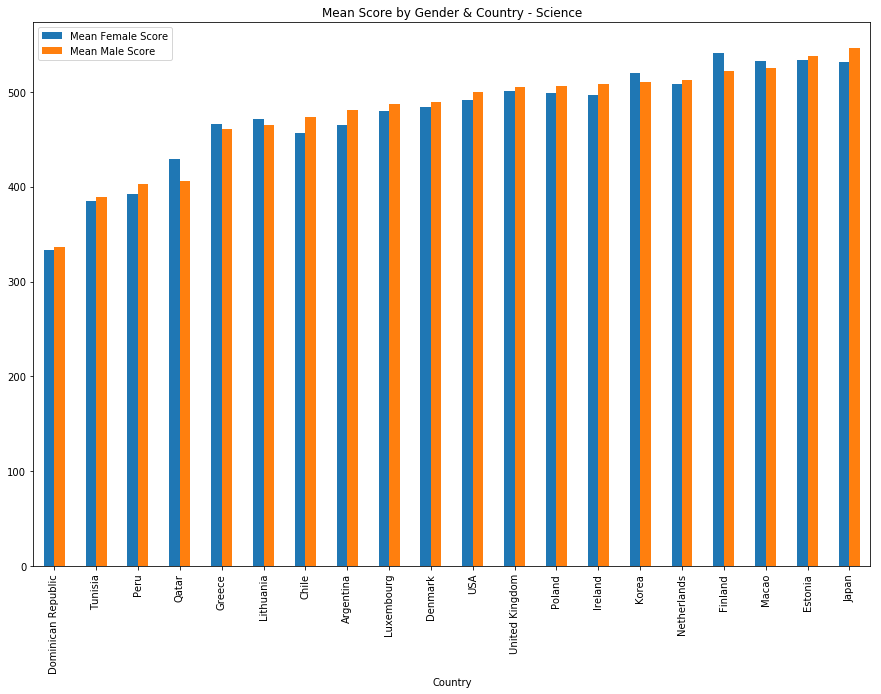

In [80]:
PISA_5.columns = ['Female Ind', 'Country', 'Mean Female Score', 'Male Ind', 'Mean Male Score' ]
PISA_5 = PISA_5[['Country', 'Mean Female Score', 'Mean Male Score']]
PISA_5 = PISA_5.sort_values(['Mean Male Score'], ascending=True)
PISA_5.plot.bar(x='Country', title = "Mean Score by Gender & Country - Science", figsize = (15,10))

In [81]:
#Now for reading....
PISA_Gender_3R = PISA_Gender_2['ReadScore'] 
PISA_4_GenderR = PISA_Gender_3R.agg('mean')
PISA_4_GenderR = PISA_4_GenderR.reset_index()

In [82]:
PISA_5R =pd.merge(PISA_4_GenderR[(PISA_4_GenderR['ST004D01T']==1.00)] , PISA_4_GenderR[(PISA_4_GenderR['ST004D01T']==2.00)], on='Country')

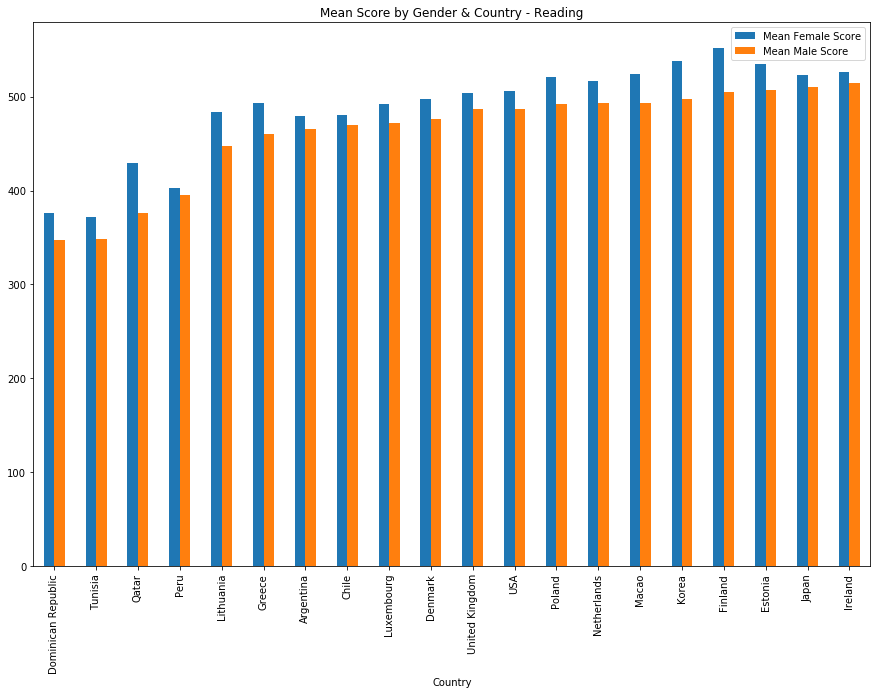

In [83]:
PISA_5R.columns = ['Female Ind', 'Country', 'Mean Female Score', 'Male Ind', 'Mean Male Score' ]
PISA_5R = PISA_5R[['Country', 'Mean Female Score', 'Mean Male Score']]
PISA_5R = PISA_5R.sort_values(['Mean Male Score'], ascending=True)
PISA_5R.plot.bar(x='Country', title = "Mean Score by Gender & Country - Reading", figsize = (15,10))

In [84]:
#Wrap it up with math
PISA_Gender_3M = PISA_Gender_2['MathScore'] 
PISA_4_GenderM = PISA_Gender_3M.agg('mean')
PISA_4_GenderM = PISA_4_GenderM.reset_index()
PISA_5M =pd.merge(PISA_4_GenderM[(PISA_4_GenderM['ST004D01T']==1.00)] , PISA_4_GenderM[(PISA_4_GenderM['ST004D01T']==2.00)], on='Country')

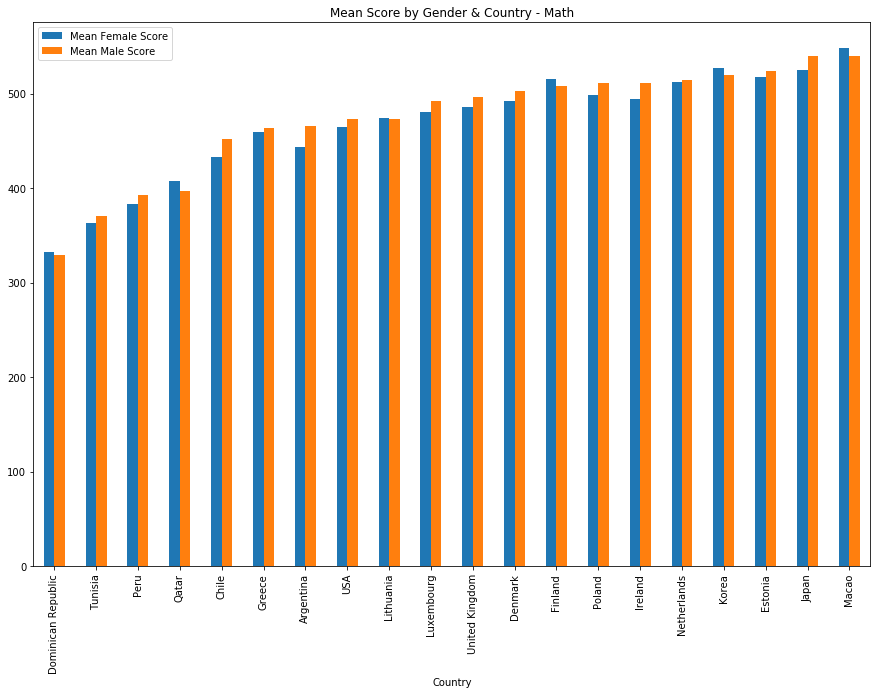

In [85]:
PISA_5M.columns = ['Female Ind', 'Country', 'Mean Female Score', 'Male Ind', 'Mean Male Score' ]
PISA_5M = PISA_5M[['Country', 'Mean Female Score', 'Mean Male Score']]
PISA_5M = PISA_5M.sort_values(['Mean Male Score'], ascending=True)
PISA_5M.plot.bar(x='Country', title = "Mean Score by Gender & Country - Math", figsize = (15,10))